In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("bbc-text.csv")

In [3]:
data

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [4]:
data['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [5]:
data.shape

(2225, 2)

In [6]:
data.dtypes

category    object
text        object
dtype: object

In [8]:
data.isnull().any() #checking whether any null data

category    False
text        False
dtype: bool

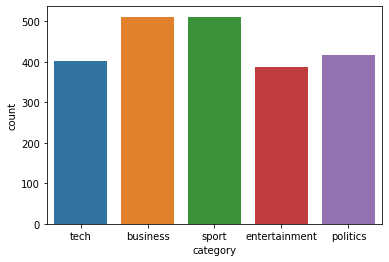

In [9]:
sns.countplot(data.category) #just a plot to checkt the no of text in each category

In [10]:
data['news_len']=data['text'].str.len() #text length

In [11]:
data['news_len']

0       4333
1       1842
2       1342
3       2176
4       1579
        ... 
2220    1745
2221     955
2222    1648
2223    4684
2224    1167
Name: news_len, Length: 2225, dtype: int64

In [34]:
data.head()

,category,text,news_len,text_parsed,Category_target
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...,4
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...,3
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...,1


In [12]:
data['news_len'].max()

25483

Text(0.5, 1.0, 'new_len')

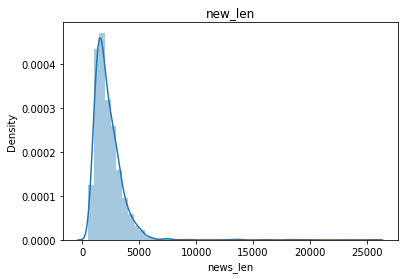

In [13]:
sns.distplot(data['news_len']).set_title('new_len')

In [14]:
def create_wordcloud(words):
  wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(words)
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

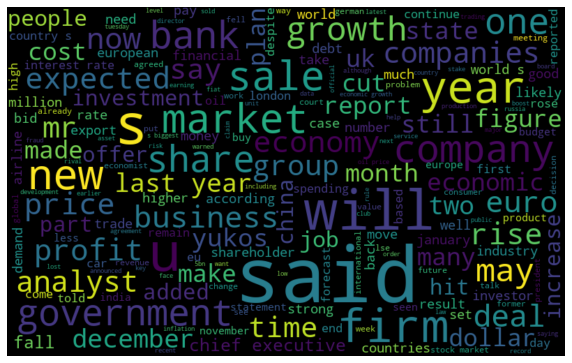

In [15]:
subset=data[data.category=="business"]
text_=subset.text.values
words= ' '.join(text_)
create_wordcloud(words)
#this is a visual representation....this shows what are the words that are repating more offenly

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')#divides list of sentence in the word
# NLTK is a toolkit build for working with NLP in Python. It provides us various text processing libraries with a lot of test datasets. A variety of tasks can be performed using NLTK such as tokenizing,

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    #filtered_sentence = [] 
    #for w in word_tokens: 
    #   if w not in stop_words: 
    #       filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

    #here we removed the stop word like is,a,the,of etc
    #also converting the upper case to lower case

In [18]:
data['text_parsed']=data['text'].apply(process_text)

In [19]:
data.head()

,category,text,news_len,text_parsed
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...


In [20]:
label_encoder=preprocessing.LabelEncoder() #labeling the categories

data['Category_target']= label_encoder.fit_transform(data['category']) 


In [21]:
data.head()

,category,text,news_len,text_parsed,Category_target
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...,4
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...,3
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...,1


In [22]:
data.to_csv('BBC_NEWS.csv')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data['text_parsed'], data['Category_target'], test_size=0.2, random_state=8)

In [24]:
X_train.head

<bound method NDFrame.head of 783     injury doubts beset wales squad wales clutch i...
1752    abba reunite musical premiere original stars s...
1140    film star fox behind theatre bid leading actor...
806     china keeps tight rein credit china efforts st...
1368    uk apology colonial past days britain apologis...
                              ...                        
986     video phone help deaf people deaf people prefe...
2181    women film earning less women uk film industry...
2033    car giant hit mercedes slump slump profitabili...
1364    evil twin fear wireless net people using wirel...
451     mg rover china tieup delayed mg rover proposed...
Name: text_parsed, Length: 1780, dtype: object>

In [25]:
X_train.shape

(1780,)

In [26]:
ngram_range = (1,2)
max_features = 300 

In [27]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)
#vectorizing the words

[[0.         0.19720545 0.         ... 0.         0.         0.        ]
 [0.         0.         0.29840098 ... 0.09158716 0.         0.12056833]
 [0.20292467 0.10688436 0.         ... 0.         0.06912208 0.19786525]
 ...
 [0.         0.12128619 0.         ... 0.         0.20467317 0.        ]
 [0.12884067 0.         0.         ... 0.         0.         0.        ]
 [0.11815315 0.         0.         ... 0.07696434 0.         0.        ]]
(445, 300)


In [28]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9550561797752809
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.99      0.93      0.96        85
           2       0.91      0.94      0.92        77
           3       0.97      0.96      0.97       102
           4       0.97      1.00      0.99        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



In [29]:
model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9617977528089887
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.99      0.96      0.98        85
           2       0.95      0.95      0.95        77
           3       0.97      0.99      0.98       102
           4       0.97      0.96      0.97        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



In [30]:
print(model_predictions)
print(labels_test)

[3 2 4 2 1 2 2 1 1 4 1 4 2 3 2 3 0 3 0 3 0 3 3 2 0 3 2 1 0 2 0 4 3 0 3 2 0
 0 1 0 0 0 0 3 3 1 3 3 4 1 2 0 1 3 0 0 1 3 3 2 1 2 3 2 4 3 1 0 0 1 0 3 1 3
 4 0 1 0 2 3 1 3 3 0 0 3 2 1 1 0 1 3 0 4 3 3 4 0 3 0 0 1 2 2 1 0 2 4 4 1 4
 3 1 1 4 4 2 0 4 1 3 4 0 1 1 1 1 3 4 2 0 4 0 0 1 3 1 4 0 0 2 1 2 2 0 3 4 1
 3 2 3 0 2 2 0 3 0 0 2 1 3 3 0 1 4 2 2 0 3 2 4 4 3 1 4 4 2 2 1 0 0 2 2 3 4
 1 3 3 4 0 0 3 3 2 4 4 4 2 1 3 3 2 2 0 3 3 3 4 0 0 0 4 3 4 1 0 0 0 4 0 1 0
 4 0 1 0 3 3 4 3 1 4 2 1 3 1 0 0 3 4 4 3 3 4 1 0 1 4 3 3 1 1 2 2 1 1 4 3 3
 0 3 1 3 3 1 3 2 3 3 3 4 4 4 0 0 2 2 4 1 2 2 3 4 4 2 2 1 0 2 2 1 1 1 3 1 1
 2 0 0 4 0 2 0 4 2 0 3 3 1 0 3 0 1 0 2 4 2 3 4 2 3 4 2 2 2 4 3 0 0 0 0 0 0
 1 2 0 0 1 0 4 1 1 0 2 1 0 4 0 3 1 2 3 2 1 2 3 1 4 3 2 4 0 3 3 3 1 3 2 3 0
 4 1 1 1 3 3 2 0 2 4 0 2 3 0 4 2 3 0 0 0 3 0 4 0 0 1 0 3 2 3 4 4 1 1 2 3 4
 0 4 2 0 4 4 1 3 2 3 1 0 4 3 1 0 3 3 4 0 3 3 0 4 0 0 4 2 1 3 3 1 4 4 2 4 0
 1]
1691    3
1103    2
477     4
197     2
475     1
       ..
149     4
486     2
1647    4
2154  

In [31]:
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9550561797752809
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.95      0.95      0.95        85
           2       0.97      0.96      0.97        77
           3       0.99      0.93      0.96       102
           4       0.95      0.97      0.96        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



In [32]:
model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8404494382022472
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       105
           1       0.84      0.86      0.85        85
           2       0.81      0.78      0.79        77
           3       0.88      0.90      0.89       102
           4       0.89      0.83      0.86        76

    accuracy                           0.84       445
   macro avg       0.84      0.84      0.84       445
weighted avg       0.84      0.84      0.84       445



In [33]:
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9101123595505618
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       105
           1       0.93      0.81      0.87        85
           2       0.92      0.94      0.93        77
           3       0.93      0.95      0.94       102
           4       0.84      0.96      0.90        76

    accuracy                           0.91       445
   macro avg       0.91      0.91      0.91       445
weighted avg       0.91      0.91      0.91       445

